<a href="https://colab.research.google.com/github/muksuratchoudhury/GitHubDemo/blob/main/A11%3A%20Unsupervised%20Machine%20Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [135]:
## import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering 
from sklearn.metrics import accuracy_score

In [136]:
## load the data
df = pd.read_csv("country-data.csv")
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [137]:
df.shape

(167, 10)

In [138]:
## country: Name of the country
## child_mort: Death of children under 5 years of age per 1000 live births
## exports: Exports of goods and services per capita. Given as %age of the GDP per capita
## health: Total health spending per capita. Given as %age of GDP per capita
## imports: Imports of goods and services per capita. Given as %age of the GDP per capita
## income: Net income per person
## inflation: The measurement of the annual growth rate of the Total GDP
## life_expec: The average number of years a new born child would live if the current mortality patterns are to remain the same
## total_fer: The number of children that would be born to each woman if the current age-fertility rates remain the same
## gdpp: The GDP per capita. Calculated as the Total GDP divided by the total population

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [140]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [141]:
## no null data

In [142]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [143]:
# T used to transpose index and columns, mean used to show mean
df.describe().T[['mean']] 

,mean
child_mort,38.270060
exports,41.108976
health,6.815689
imports,46.890215
income,17144.688623
inflation,7.781832
life_expec,70.555689
total_fer,2.947964
gdpp,12964.155689


**DATA ANALYSIS**

In [144]:
## correlation matrix
corr_matrix = df.corr()
corr_matrix


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.318093,-0.200402,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.318093,1.000000,-0.114408,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725
health,-0.200402,-0.114408,1.000000,0.095717,0.129579,-0.255376,0.210692,-0.196674,0.345966
imports,-0.127211,0.737381,0.095717,1.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498
income,-0.524315,0.516784,0.129579,0.122406,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.107294,-0.255376,-0.246994,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.316313,0.210692,0.054391,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.320011,-0.196674,-0.159048,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.418725,0.345966,0.115498,0.895571,-0.221631,0.600089,-0.454910,1.000000


<AxesSubplot:title={'center':'Correlation Matrix of Country Data'}>

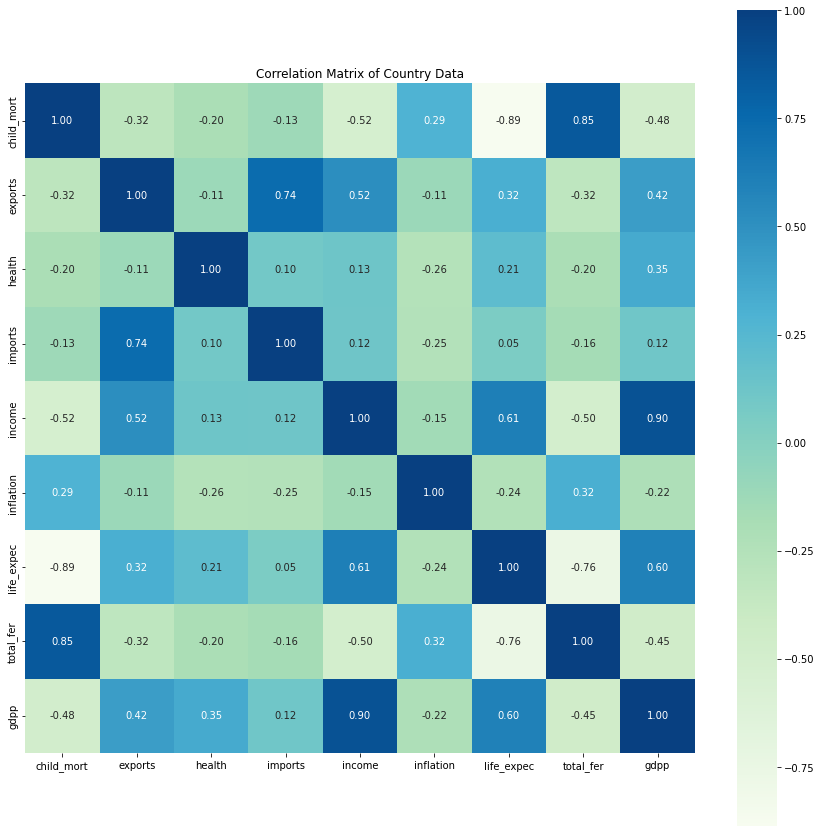

In [145]:
##heatmap
plt.figure(figsize=(15,15))
plt.title("Correlation Matrix of Country Data")
sns.heatmap(corr_matrix, annot=True, cmap='GnBu', square=True, fmt='.2f')

<AxesSubplot:title={'center':'Correlation Matrix of Country Data'}>

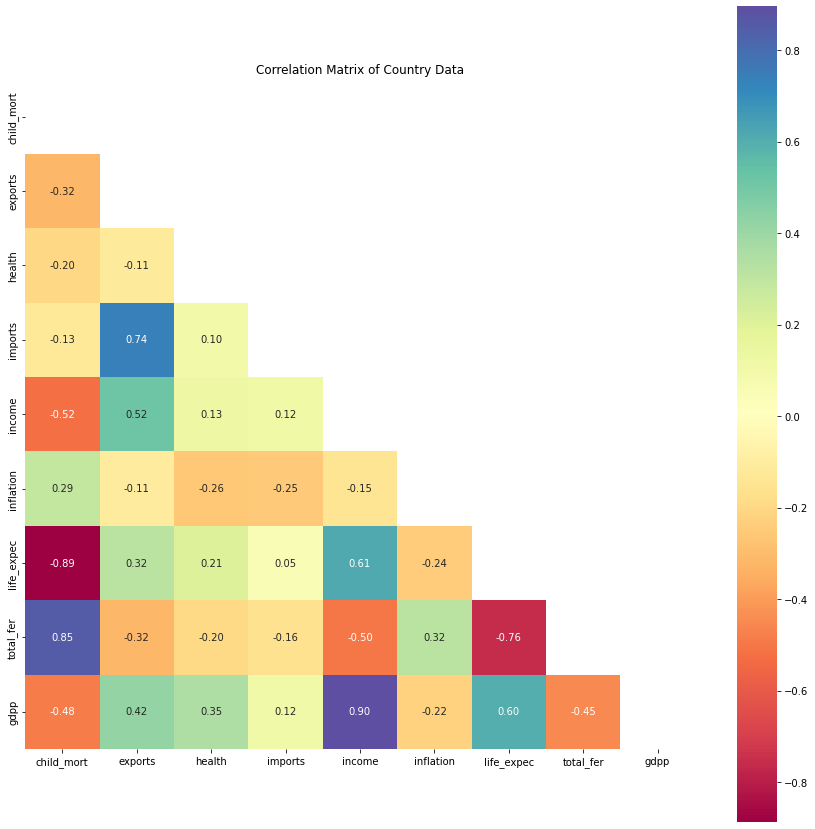

In [146]:
## the triu() function is used to get a copy of a matrix with the elements below the k-th diagonal zeroed
mask = np.triu(df.corr())

plt.figure(figsize=(15,15))
plt.title("Correlation Matrix of Country Data")
sns.heatmap(corr_matrix, annot=True, cmap='Spectral', square=True, fmt='.2f', mask=mask)

In [147]:
## income is highly correlated with gdpp at 90%
## child mortality is highly correlated with total fertility rate at 85%
## exports and imports are correlated at 74%

## child mortality and life expectancy are very negagively correlated at -89% meaning child mortality is high when life expectancy goes down
## child mortality is low when income and gdpp is high

## when income is high, life expectancy is also high
## when income is low, total fetility is low
## when life expentancy is high, total fertility is low at -76%
## when life expentancy is high, gdpp is also high

In [148]:
## Histogram of distribution by feature

## 9 features
col = df.columns[1:10] ## columns excluding country (1) and including 9th column for gdpp (by entering 10)
col

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

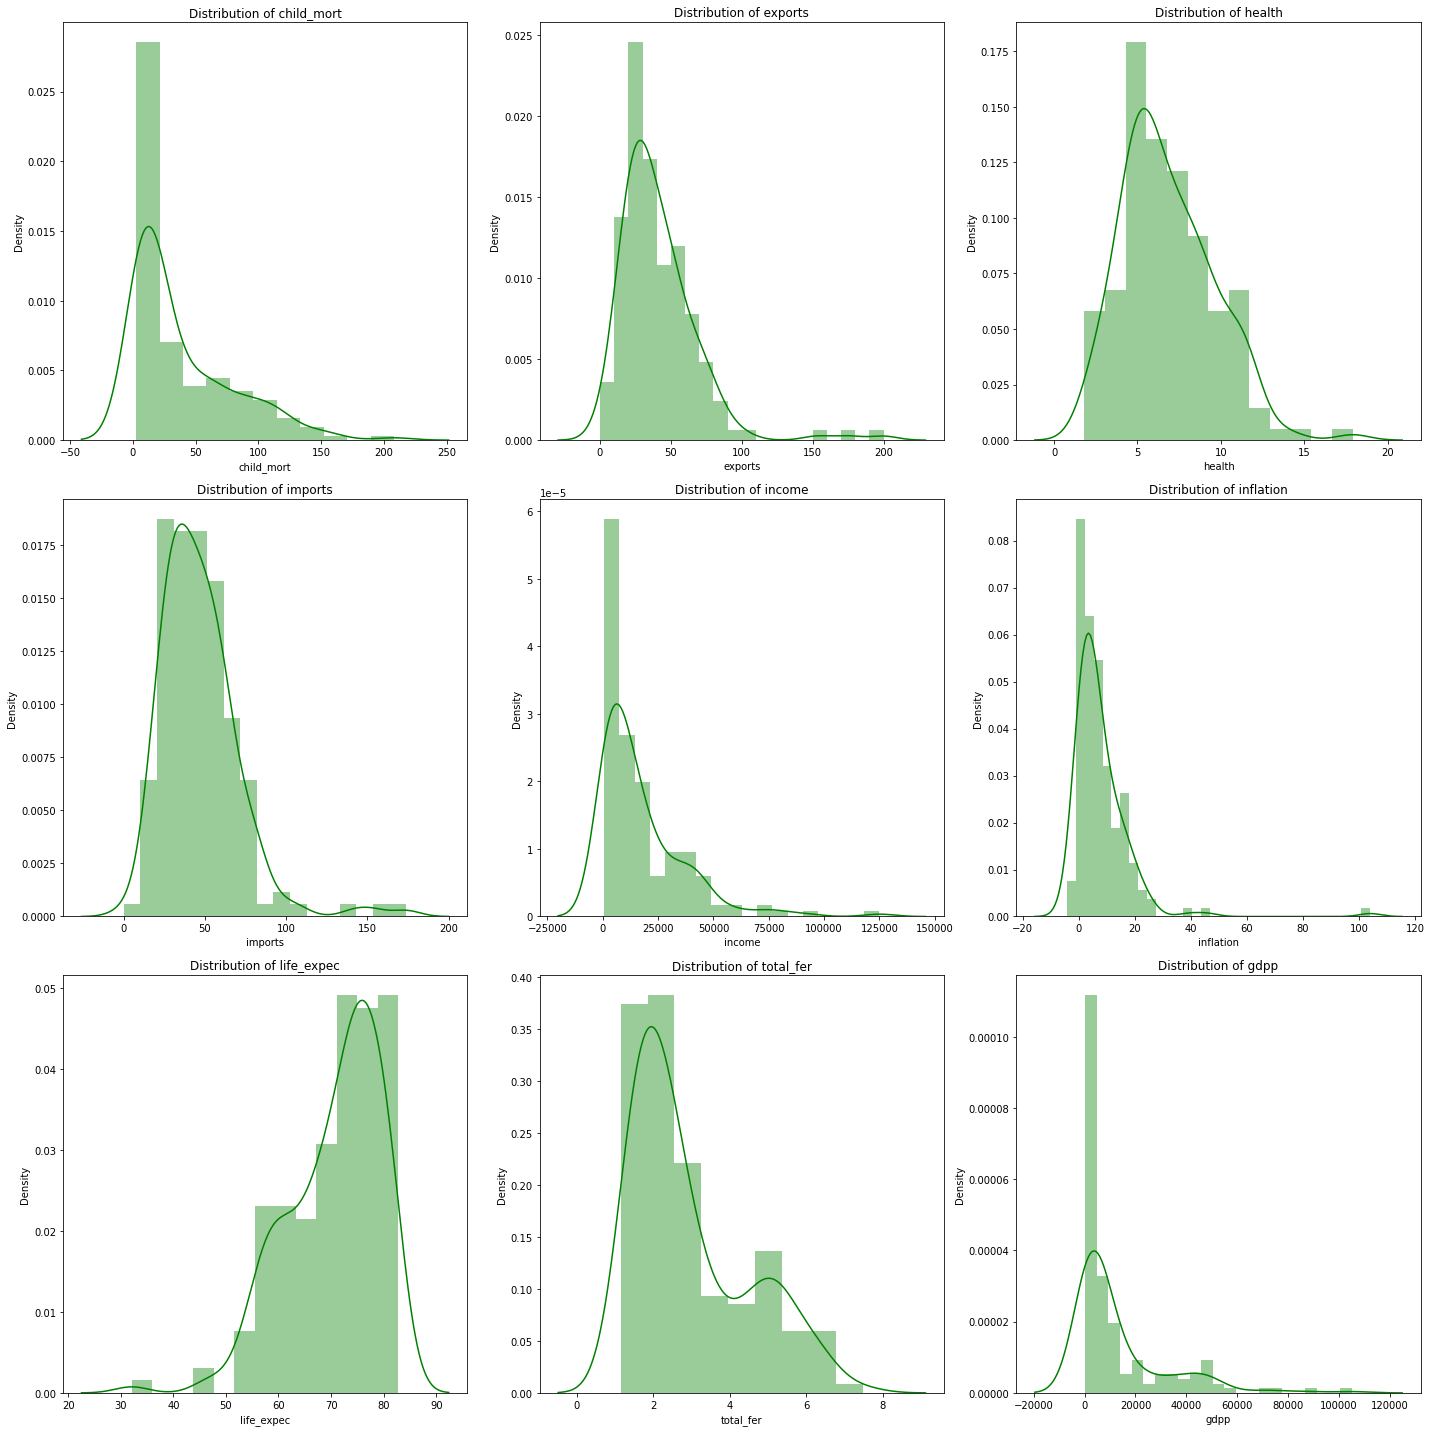

In [149]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(20,20)) ## 3 by 3 subplots

for i in range(0, 9):  # the number of the numerical features = 9
    plt.subplot(3,3,i+1)
    sns.distplot(df[col[i]], kde=True, color = 'green') ## kde=true includes curve in plot
    title = 'Distribution of ' + col[i]
    plt.title(title)
plt.tight_layout() ## used to fit in subplot area
plt.show()

In [150]:
## postively skewed: child mortality, exports, imports, income, inflation, total fetility, dgpp
## negatively skewed: life expectancy
## fairly normal distribution: health

In [151]:
## child mortality

In [152]:
data_cm = df.sort_values(ascending = False, by = 'child_mort').iloc[0:6]

In [153]:
df_child_mort = pd.DataFrame(data_cm['child_mort'])

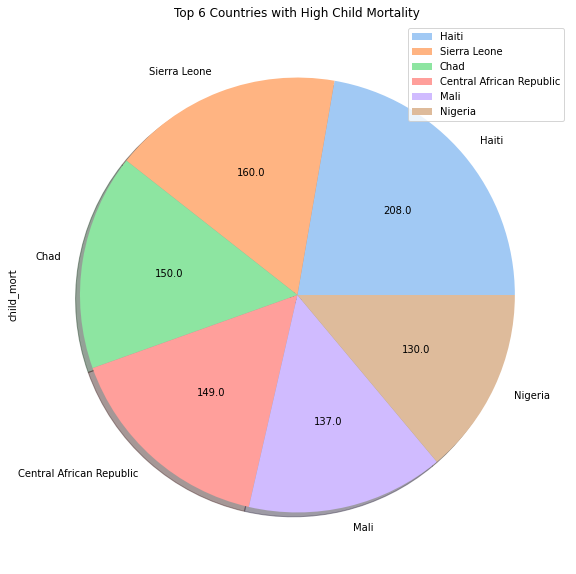

In [154]:
fig, ax=plt.subplots()
# add colours
colors=sns.color_palette('pastel')
def absolute_value(val): # to show the actual values not percents
    a  = np.round(val/100.*data_cm['child_mort'].sum(), 0)
    return a
data_cm.plot(kind='pie', y='child_mort', title = 'Top 6 Countries with High Child Mortality', labels = data_cm['country'], autopct=absolute_value, colors = colors, ax=ax, figsize=(10,10), shadow=True)
plt.show()

In [155]:
## Haiti (Central America) has the highest number of child mortality
## other countries located in Africa are also seen in the top 6 of highest child mortality

In [156]:
data_cm2 = df.sort_values(ascending = False, by = 'child_mort').iloc[161:167]

In [157]:
df_child_mort2 = pd.DataFrame(data_cm2['child_mort'])

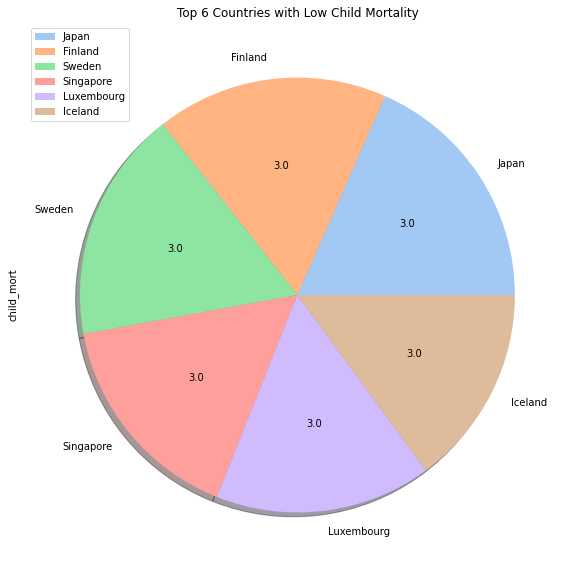

In [158]:
fig, ax=plt.subplots()
# add colours
colors=sns.color_palette('pastel')
def absolute_value(val): # to show the actual values not percents
    a  = np.round(val/100.*data_cm2['child_mort'].sum(), 0)
    return a
data_cm2.plot(kind='pie', y='child_mort', title = 'Top 6 Countries with Low Child Mortality', labels = data_cm2['country'], autopct=absolute_value, colors = colors, ax=ax, figsize=(10,10), shadow=True)
plt.show()

In [159]:
## European countries and few Asian countries have the lowest child mortality rates

In [160]:
## exports

In [161]:
data_e = df.sort_values(ascending = False, by = 'exports').iloc[0:6]

In [162]:
df_exports = pd.DataFrame(data_e['exports'])

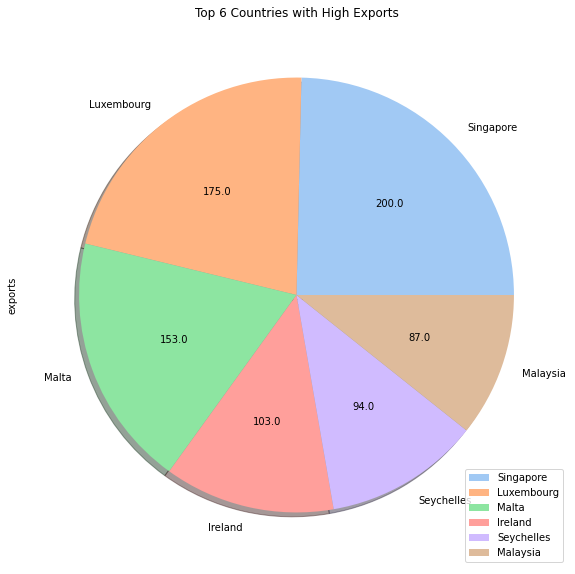

In [163]:
fig, ax=plt.subplots()
# add colours
colors=sns.color_palette('pastel')
def absolute_value(val): # to show the actual values not percents
    a  = np.round(val/100.*data_e['exports'].sum(), 0)
    return a
data_e.plot(kind='pie', y='exports', title = 'Top 6 Countries with High Exports', labels = data_e['country'], autopct=absolute_value, colors = colors, ax=ax, figsize=(10,10), shadow=True)
plt.show()

In [164]:
## Singapore has the largest number of exports
## some European countries are also in the top 6 for highest exports

In [165]:
data_e2 = df.sort_values(ascending = False, by = 'exports').iloc[161:167]

In [166]:
df_exports2 = pd.DataFrame(data_e2['exports'])

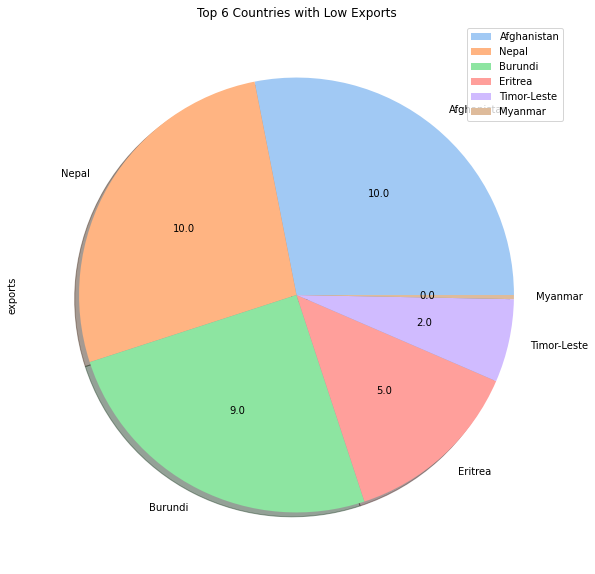

In [167]:
fig, ax=plt.subplots()
# add colours
colors=sns.color_palette('pastel')
def absolute_value(val): # to show the actual values not percents
    a  = np.round(val/100.*data_e2['exports'].sum(), 0)
    return a
data_e2.plot(kind='pie', y='exports', title = 'Top 6 Countries with Low Exports', labels = data_e2['country'], autopct=absolute_value, colors = colors, ax=ax, figsize=(10,10), shadow=True)
plt.show()

In [168]:
## Some of the countries with low exports are in Africa and Asia

In [169]:
## imports

In [170]:
data_i = df.sort_values(ascending = False, by = 'imports').iloc[0:6]

In [171]:
df_imports = pd.DataFrame(data_i['imports'])

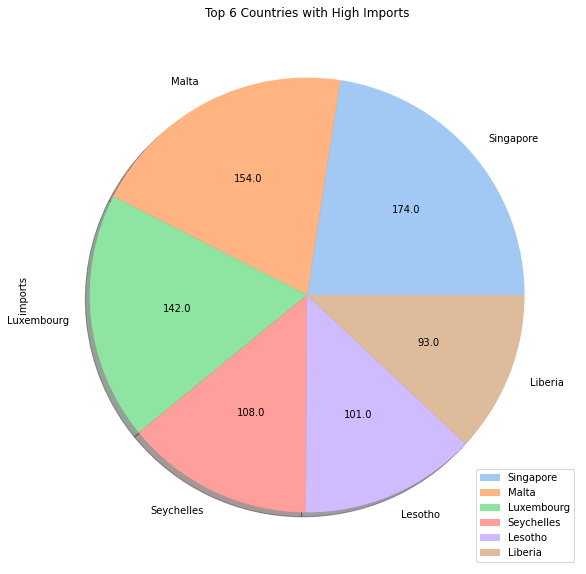

In [172]:
fig, ax=plt.subplots()
# add colours
colors=sns.color_palette('pastel')
def absolute_value(val): # to show the actual values not percents
    a  = np.round(val/100.*data_i['imports'].sum(), 0)
    return a
data_i.plot(kind='pie', y='imports', title = 'Top 6 Countries with High Imports', labels = data_i['country'], autopct=absolute_value, colors = colors, ax=ax, figsize=(10,10), shadow=True)
plt.show()

In [173]:
## Singapore, Malta, Luxembourg and Seychelles are in the top 6 for importing the most as well as exporting the most

In [174]:
data_i2 = df.sort_values(ascending = False, by = 'imports').iloc[161:167]

In [175]:
df_imports2 = pd.DataFrame(data_i2['imports'])

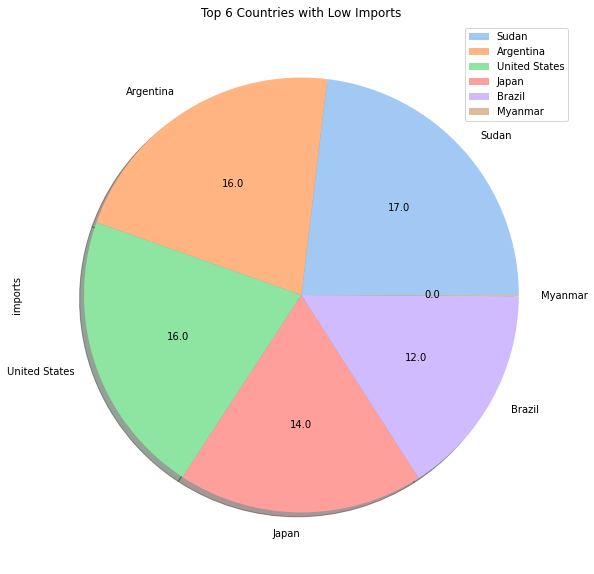

In [176]:
fig, ax=plt.subplots()
# add colours
colors=sns.color_palette('pastel')
def absolute_value(val): # to show the actual values not percents
    a  = np.round(val/100.*data_i2['imports'].sum(), 0)
    return a
data_i2.plot(kind='pie', y='imports', title = 'Top 6 Countries with Low Imports', labels = data_i2['country'], autopct=absolute_value, colors = colors, ax=ax, figsize=(10,10), shadow=True)
plt.show()

In [177]:
## Myanmar and Brazil are among the countries with the least imports, Myanmar being at 0 for both imports and exports
## Sudan, Argentina, US and Japan are other countries that have low imports

In [178]:
## health spend

In [179]:
data_h = df.sort_values(ascending = False, by = 'health').iloc[0:6]

In [180]:
df_health = pd.DataFrame(data_h['health'])

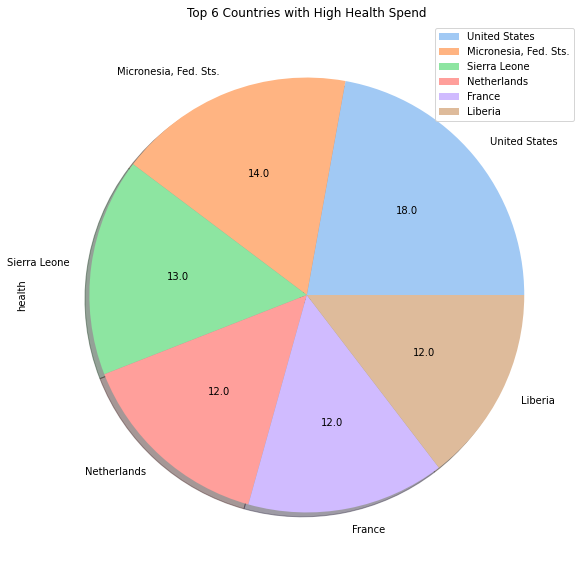

In [181]:
fig, ax=plt.subplots()
# add colours
colors=sns.color_palette('pastel')
def absolute_value(val): # to show the actual values not percents
    a  = np.round(val/100.*data_h['health'].sum(), 0)
    return a
data_h.plot(kind='pie', y='health', title = 'Top 6 Countries with High Health Spend', labels = data_h['country'], autopct=absolute_value, colors = colors, ax=ax, figsize=(10,10), shadow=True)
plt.show()

In [182]:
## US spends the most on health, followed by some European countries

In [183]:
data_h2 = df.sort_values(ascending = False, by = 'health').iloc[161:167]

In [184]:
df_health2 = pd.DataFrame(data_h2['health'])

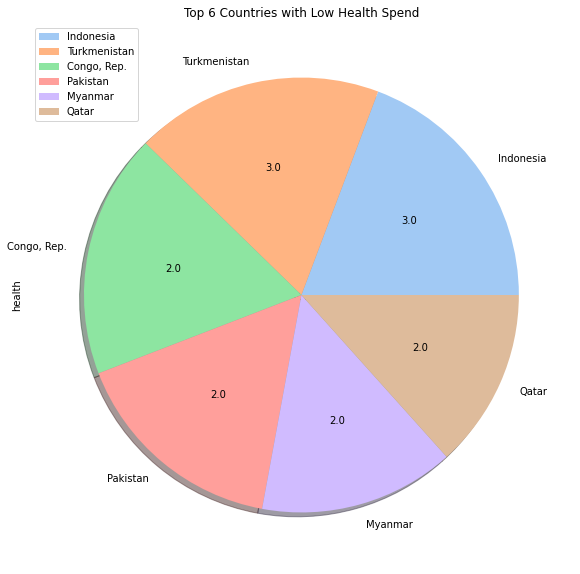

In [185]:
fig, ax=plt.subplots()
# add colours
colors=sns.color_palette('pastel')
def absolute_value(val): # to show the actual values not percents
    a  = np.round(val/100.*data_h2['health'].sum(), 0)
    return a
data_h2.plot(kind='pie', y='health', title = 'Top 6 Countries with Low Health Spend', labels = data_h2['country'], autopct=absolute_value, colors = colors, ax=ax, figsize=(10,10), shadow=True)
plt.show()

In [186]:
## Asian countries spend less on health

In [187]:
## income

In [188]:
data_in = df.sort_values(ascending = False, by = 'income').iloc[0:6]

In [189]:
df_income = pd.DataFrame(data_in['income'])

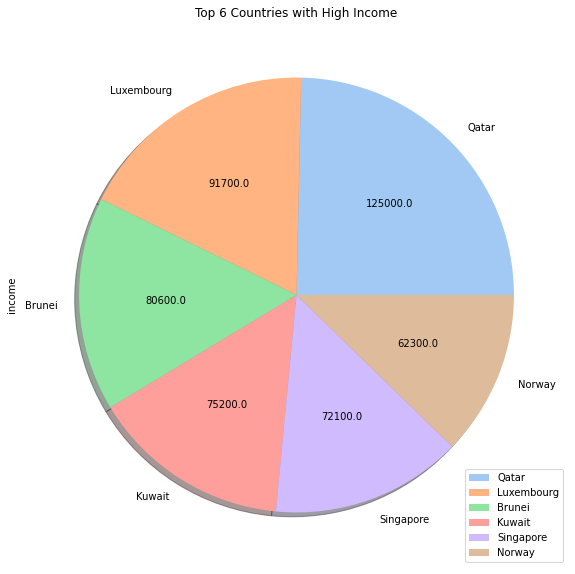

In [190]:
fig, ax=plt.subplots()
# add colours
colors=sns.color_palette('pastel')
def absolute_value(val): # to show the actual values not percents
    a  = np.round(val/100.*data_in['income'].sum(), 0)
    return a
data_in.plot(kind='pie', y='income', title = 'Top 6 Countries with High Income', labels = data_in['country'], autopct=absolute_value, colors = colors, ax=ax, figsize=(10,10), shadow=True)
plt.show()

In [191]:
## Qatar has the highest income 
## some South Asian countries are in the top 6 for income

In [192]:
data_in2 = df.sort_values(ascending = False, by = 'income').iloc[161:167]

In [193]:
df_income2 = pd.DataFrame(data_in2['income'])

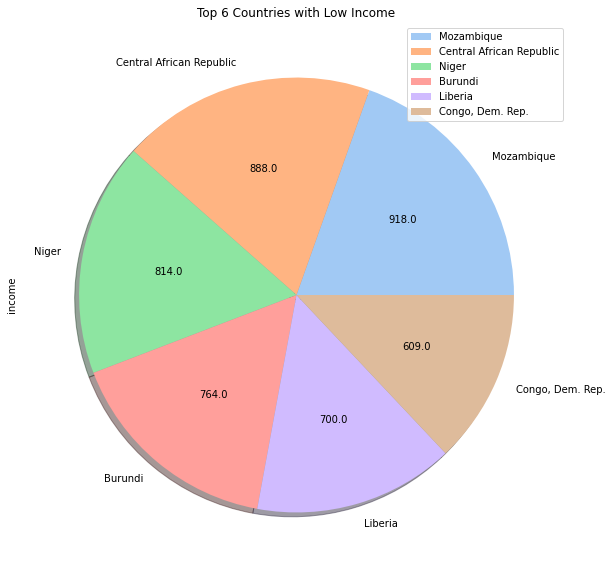

In [194]:
fig, ax=plt.subplots()
# add colours
colors=sns.color_palette('pastel')
def absolute_value(val): # to show the actual values not percents
    a  = np.round(val/100.*data_in2['income'].sum(), 0)
    return a
data_in2.plot(kind='pie', y='income', title = 'Top 6 Countries with Low Income', labels = data_in2['country'], autopct=absolute_value, colors = colors, ax=ax, figsize=(10,10), shadow=True)
plt.show()

In [195]:
## some African countries are seen in the top 6 for least income

In [196]:
## inflation

In [197]:
data_if = df.sort_values(ascending = False, by = 'inflation').iloc[0:6]

In [198]:
df_if = pd.DataFrame(data_if['inflation'])

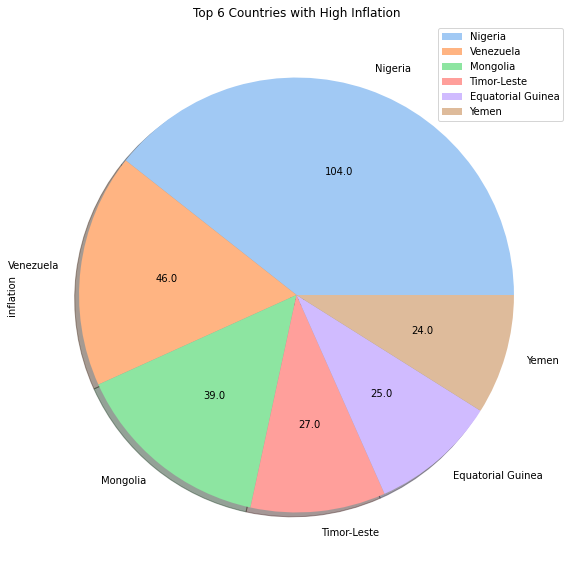

In [199]:
fig, ax=plt.subplots()
# add colours
colors=sns.color_palette('pastel')
def absolute_value(val): # to show the actual values not percents
    a  = np.round(val/100.*data_if['inflation'].sum(), 0)
    return a
data_if.plot(kind='pie', y='inflation', title = 'Top 6 Countries with High Inflation', labels = data_if['country'], autopct=absolute_value, colors = colors, ax=ax, figsize=(10,10), shadow=True)
plt.show()

In [200]:
## Nigeria has the most inflation by far

In [201]:
data_if2 = df.sort_values(ascending = False, by = 'inflation').iloc[161:167]

In [202]:
df_if2 = pd.DataFrame(data_if2['inflation'])

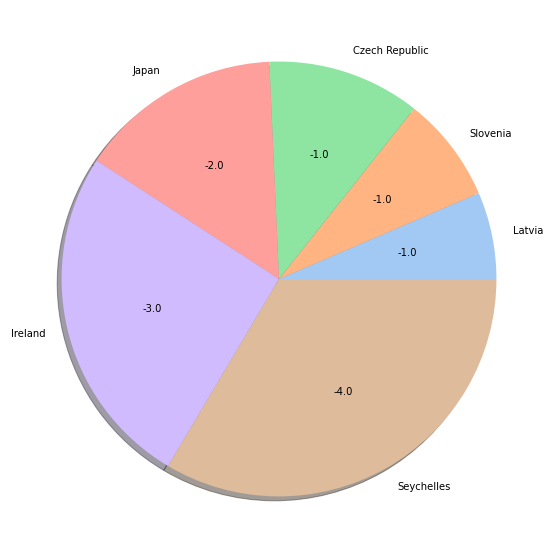

In [203]:
def absolute_value(val): # to show the actual values not percents
    a  = np.round(val/100.*data_if2['inflation'].sum(), 0)
    return a
    plt.title('Top 6 Countries with Low Inflation')
plt.figure(figsize=(10,10))
plt.pie(data=data_if2, x=abs(data_if2['inflation']), labels=data_if2['country'], autopct=absolute_value, colors = colors, shadow=True)
plt.show()

In [204]:
## Some countries have negative inflation, meaning deflation

In [205]:
## life expectancy

In [206]:
data_le = df.sort_values(ascending = False, by = 'life_expec').iloc[0:6]

In [207]:
df_le = pd.DataFrame(data_le['life_expec'])

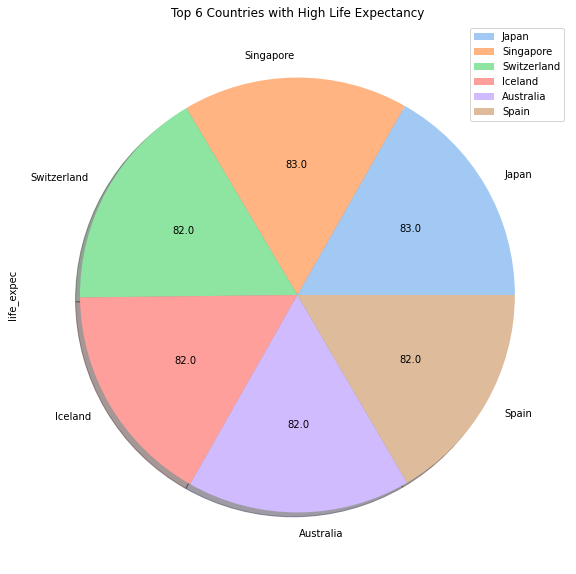

In [208]:
fig, ax=plt.subplots()
# add colours
colors=sns.color_palette('pastel')
def absolute_value(val): # to show the actual values not percents
    a  = np.round(val/100.*data_le['life_expec'].sum(), 0)
    return a
data_le.plot(kind='pie', y='life_expec', title = 'Top 6 Countries with High Life Expectancy', labels = data_le['country'], autopct=absolute_value, colors = colors, ax=ax, figsize=(10,10), shadow=True)
plt.show()

In [209]:
## The top countries with highest life expectancy are very similar from 82-83

In [210]:
data_le2 = df.sort_values(ascending = False, by = 'life_expec').iloc[161:167]

In [211]:
df_le2 = pd.DataFrame(data_le2['life_expec'])

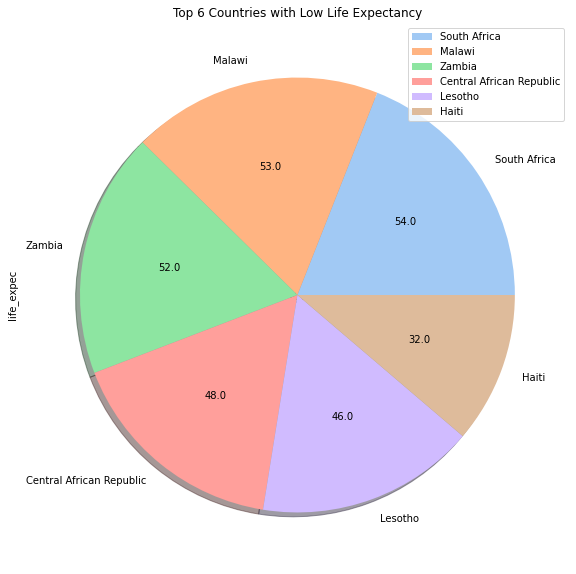

In [212]:
fig, ax=plt.subplots()
# add colours
colors=sns.color_palette('pastel')
def absolute_value(val): # to show the actual values not percents
    a  = np.round(val/100.*data_le2['life_expec'].sum(), 0)
    return a
data_le2.plot(kind='pie', y='life_expec', title = 'Top 6 Countries with Low Life Expectancy', labels = data_le2['country'], autopct=absolute_value, colors = colors, ax=ax, figsize=(10,10), shadow=True)
plt.show()

In [213]:
## African countries have the lowest life expectancy and are featured in the last 6 again

In [214]:
## total fertility

In [215]:
data_tf = df.sort_values(ascending = False, by = 'total_fer').iloc[0:6]

In [216]:
df_tf = pd.DataFrame(data_h['total_fer'])

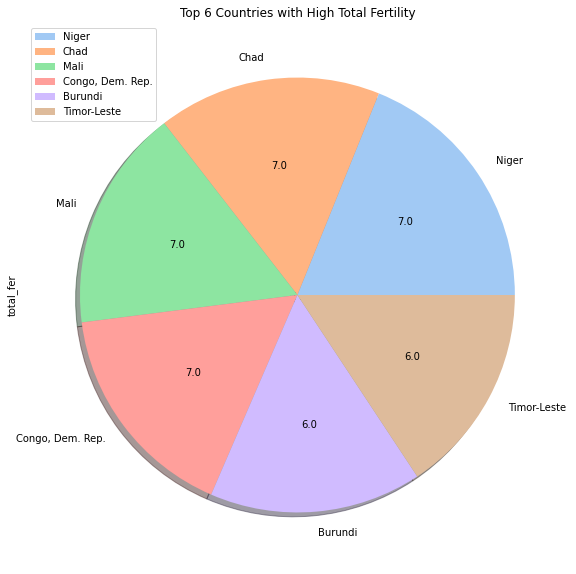

In [217]:
fig, ax=plt.subplots()
# add colours
colors=sns.color_palette('pastel')
def absolute_value(val): # to show the actual values not percents
    a  = np.round(val/100.*data_tf['total_fer'].sum(), 0)
    return a
data_tf.plot(kind='pie', y='total_fer', title = 'Top 6 Countries with High Total Fertility', labels = data_tf['country'], autopct=absolute_value, colors = colors, ax=ax, figsize=(10,10), shadow=True)
plt.show()

In [218]:
## African countries have the highest fertility rates

In [219]:
data_tf2 = df.sort_values(ascending = False, by = 'total_fer').iloc[161:167]

In [220]:
df_tf2 = pd.DataFrame(data_tf2['total_fer'])

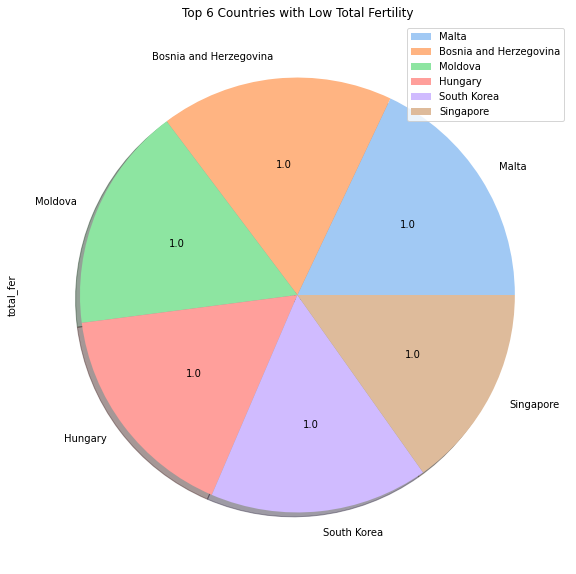

In [221]:
fig, ax=plt.subplots()
# add colours
colors=sns.color_palette('pastel')
def absolute_value(val): # to show the actual values not percents
    a  = np.round(val/100.*data_tf2['total_fer'].sum(), 0)
    return a
data_tf2.plot(kind='pie', y='total_fer', title = 'Top 6 Countries with Low Total Fertility', labels = data_tf2['country'], autopct=absolute_value, colors = colors, ax=ax, figsize=(10,10), shadow=True)
plt.show()

In [222]:
## there is a mix of Asian and European countries with the lowest total fertility
## the lowest fertility is 1

In [223]:
## gdpp

In [224]:
data_g = df.sort_values(ascending = False, by = 'gdpp').iloc[0:6]

In [225]:
df_g = pd.DataFrame(data_g['gdpp'])

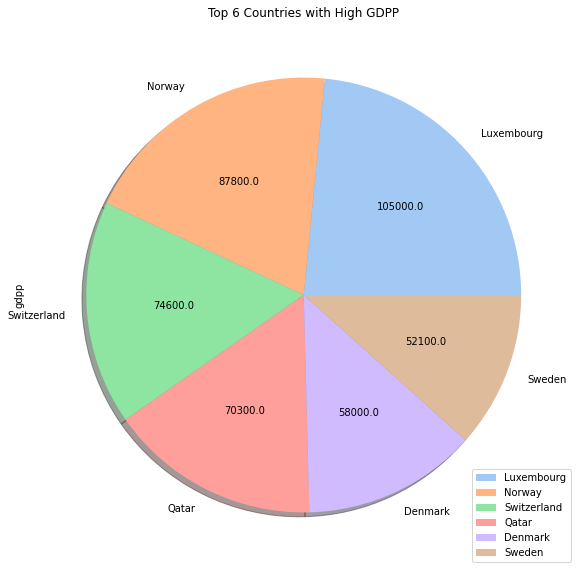

In [226]:
fig, ax=plt.subplots()
# add colours
colors=sns.color_palette('pastel')
def absolute_value(val): # to show the actual values not percents
    a  = np.round(val/100.*data_g['gdpp'].sum(), 0)
    return a
data_g.plot(kind='pie', y='gdpp', title = 'Top 6 Countries with High GDPP', labels = data_g['country'], autopct=absolute_value, colors = colors, ax=ax, figsize=(10,10), shadow=True)
plt.show()

In [227]:
## some of the countries with the highest GDPP are European countries
## Luxembourg features among the top six countries again and has the highest GDPP

In [228]:
data_g2 = df.sort_values(ascending = False, by = 'gdpp').iloc[161:167]

In [229]:
df_g2 = pd.DataFrame(data_g2['gdpp'])

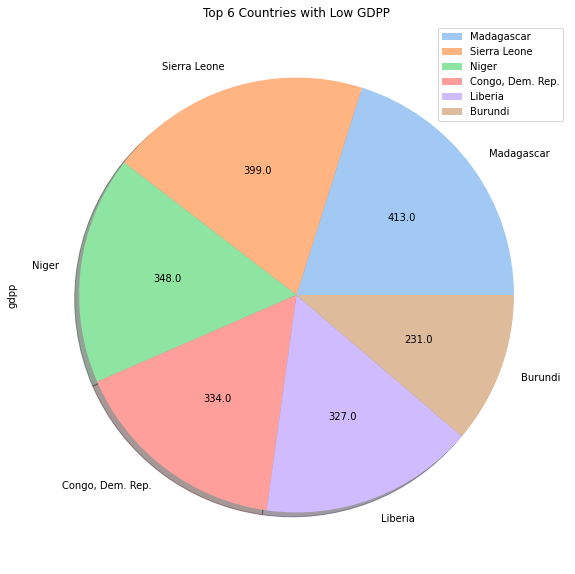

In [230]:
fig, ax=plt.subplots()
# add colours
colors=sns.color_palette('pastel')
def absolute_value(val): # to show the actual values not percents
    a  = np.round(val/100.*data_g2['gdpp'].sum(), 0)
    return a
data_g2.plot(kind='pie', y='gdpp', title = 'Top 6 Countries with Low GDPP', labels = data_g2['country'], autopct=absolute_value, colors = colors, ax=ax, figsize=(10,10), shadow=True)
plt.show()

In [231]:
## African countries feature in the bottom 6 again

In [232]:
## conclusion: 
# most African countries feature in the bottom 6 where they have lower income and GDPP, but import more
# this shows African countries are more dependent on other countries
# inflation, fertility rate and child mortality are high causing a low life expectancy in these countries

In [233]:
## OUTLIERS

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

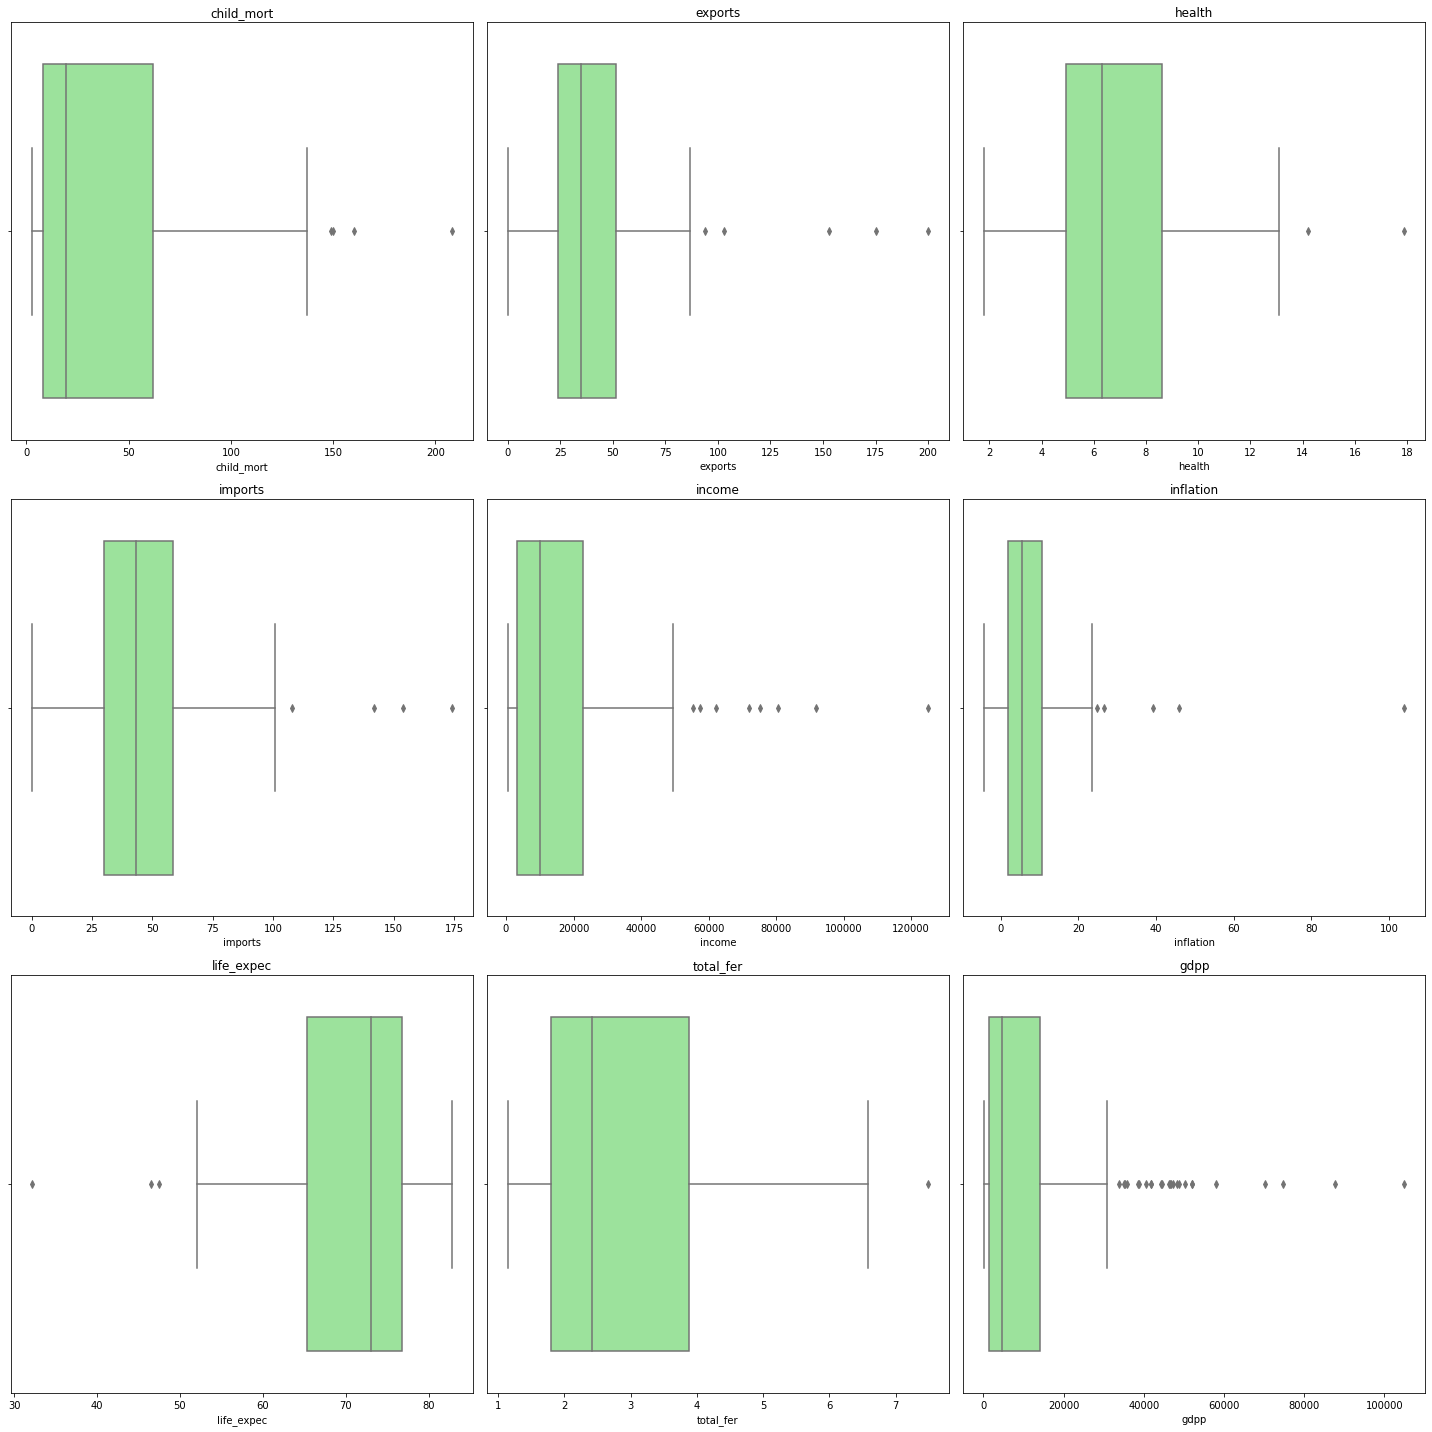

In [234]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(20,20)) ## 3 by 3 subplots

for i in range(0,9):  # the number of the numerical features = 9
    plt.subplot(3,3,i+1)
    sns.boxplot(df[col[i]], color = 'lightgreen') ## kde=true includes curve in plot
    plt.title(col[i])
plt.tight_layout() ## used to fit in subplot area
plt.show()

**DATA PREPROCESSING**

In [235]:
## drop country column
df_new = df.drop('country', axis=1)

In [236]:
# standardise/normalise data
standard = StandardScaler()
minmax = MinMaxScaler()

In [237]:
# standardise 'health' column due to normal distribution

In [238]:
df_new['health'] = standard.fit_transform(df_new[['health']])

In [239]:
## normalise all other columns

In [240]:
col_other = df_new.drop('health', axis = 1)

for i in col_other.columns:
    df_new[i] = minmax.fit_transform(df_new[[i]])   

In [241]:
df_new

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.426485,0.049482,0.279088,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073
1,0.068160,0.139531,-0.097016,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833
2,0.120253,0.191559,-0.966073,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365
3,0.566699,0.311125,-1.448071,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488
4,0.037488,0.227079,-0.286894,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242
...,...,...,...,...,...,...,...,...,...
162,0.129503,0.232582,-0.571711,0.302609,0.018820,0.063118,0.609467,0.370662,0.026143
163,0.070594,0.142032,-0.695862,0.100809,0.127750,0.463081,0.854043,0.208202,0.126650
164,0.100779,0.359651,0.008877,0.460715,0.031200,0.150725,0.808679,0.126183,0.010299
165,0.261441,0.149536,-0.597272,0.197397,0.031120,0.257000,0.698225,0.555205,0.010299


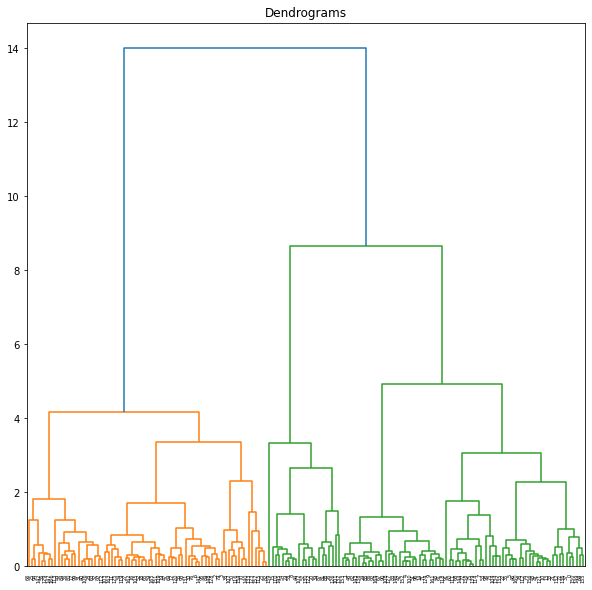

In [242]:
## create dendrogram

plt.figure(figsize=(10,10))
plt.title('Dendrograms')
dend = shc.dendrogram(shc.linkage(df_new, method='ward'))

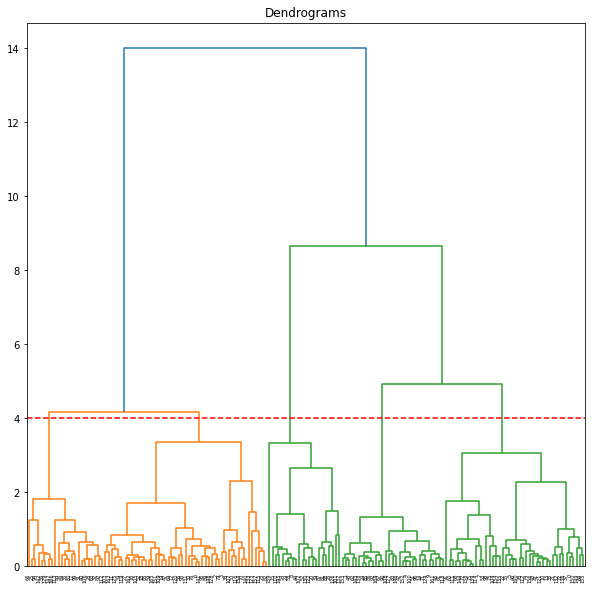

In [243]:
## if we break the clusters from 4, we will have many clusters

plt.figure(figsize=(10,10))
plt.title('Dendrograms')
dend = shc.dendrogram(shc.linkage(df_new, method='ward'))
plt.axhline(y= 4, color='r', linestyle= '--')

In [244]:
## train model

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
clust_labels1 = cluster.fit_predict(df_new)

## euclidean helps calculate distances between different clusters before merge

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [245]:
df_new.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.426485,0.049482,0.279088,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073
1,0.068160,0.139531,-0.097016,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833
2,0.120253,0.191559,-0.966073,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365
3,0.566699,0.311125,-1.448071,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488
4,0.037488,0.227079,-0.286894,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242


In [246]:
def doAgglomerative(X, nclust=2):
   return (clust_labels1)

In [247]:
clust_labels1 = doAgglomerative(df_new, 3)
agglomerative = pd.DataFrame(clust_labels1)
df_new.insert((df_new.shape[1]),'agglomerative',agglomerative)

In [248]:
df_new.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,agglomerative
0,0.426485,0.049482,0.279088,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073,0
1,0.068160,0.139531,-0.097016,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833,0
2,0.120253,0.191559,-0.966073,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365,1
3,0.566699,0.311125,-1.448071,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488,1
4,0.037488,0.227079,-0.286894,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242,0


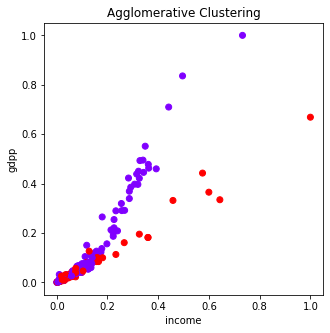

In [249]:
## scatter plot to show the clusters

plt.figure(figsize=(5,5))
plt.title('Agglomerative Clustering')
plt.xlabel('income')
plt.ylabel('gdpp')
plt.scatter(df_new['income'], df_new['gdpp'], c=cluster.labels_, cmap='rainbow')

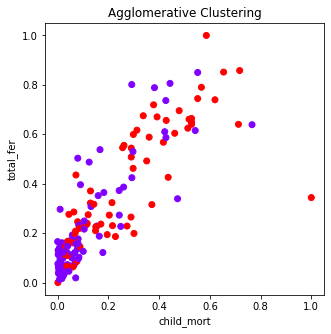

In [250]:
plt.figure(figsize=(5,5))
plt.title('Agglomerative Clustering')
plt.xlabel('child_mort')
plt.ylabel('total_fer')
plt.scatter(df_new['child_mort'], df_new['total_fer'], c=cluster.labels_, cmap='rainbow')

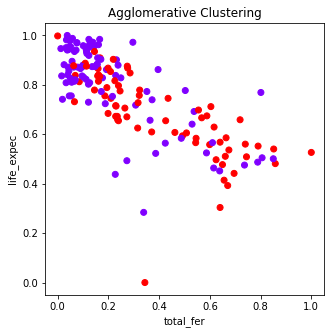

In [251]:
plt.figure(figsize=(5,5))
plt.title('Agglomerative Clustering')
plt.xlabel('total_fer')
plt.ylabel('life_expec')
plt.scatter(df_new['total_fer'], df_new['life_expec'], c=cluster.labels_, cmap='rainbow')

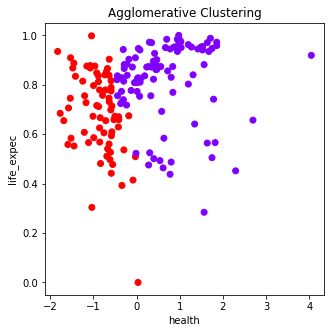

In [252]:
plt.figure(figsize=(5,5))
plt.title('Agglomerative Clustering')
plt.xlabel('health')
plt.ylabel('life_expec')
plt.scatter(df_new['health'], df_new['life_expec'], c=cluster.labels_, cmap='rainbow')

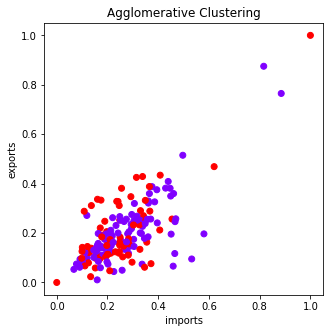

In [253]:
plt.figure(figsize=(5,5))
plt.title('Agglomerative Clustering')
plt.xlabel('imports')
plt.ylabel('exports')
plt.scatter(df_new['imports'], df_new['exports'], c=cluster.labels_, cmap='rainbow')

In [254]:
label_mapping = {0:"cluster0",1:"cluster1",2:"cluster2"}
df_new["cluster_name"] = df_new["agglomerative"].apply(lambda x: label_mapping[x])

In [255]:
df_new[df_new['cluster_name'] == "cluster0"]

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,agglomerative,cluster_name
0,0.426485,0.049482,0.279088,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073,0,cluster0
1,0.068160,0.139531,-0.097016,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833,0,cluster0
4,0.037488,0.227079,-0.286894,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242,0,cluster0
5,0.057936,0.094006,0.468966,0.091610,0.145437,0.232049,0.861933,0.192429,0.096107,0,cluster0
7,0.010711,0.098509,0.699011,0.119782,0.327926,0.049626,0.984221,0.123028,0.493171,0,cluster0
...,...,...,...,...,...,...,...,...,...,...,...
158,0.012658,0.140532,1.031297,0.176700,0.286122,0.053415,0.950690,0.121451,0.369088,0,cluster0
159,0.022882,0.061489,4.047436,0.090460,0.392239,0.050180,0.919132,0.123028,0.459764,0,cluster0
160,0.038948,0.131026,0.560254,0.145653,0.132574,0.084281,0.873767,0.146688,0.111378,0,cluster0
161,0.164070,0.158041,-0.367227,0.163476,0.029190,0.191387,0.723866,0.187697,0.010967,0,cluster0


In [256]:
df_new[df_new['cluster_name'] == "cluster1"]

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,agglomerative,cluster_name
2,0.120253,0.191559,-0.966073,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365,1,cluster1
3,0.566699,0.311125,-1.448071,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488,1,cluster1
6,0.075463,0.103511,-0.882089,0.260065,0.048967,0.110711,0.812623,0.085174,0.028529,1,cluster1
11,0.029211,0.347144,-0.673953,0.292261,0.325514,0.107661,0.865878,0.159306,0.195373,1,cluster1
12,0.227848,0.079498,-1.203420,0.124956,0.014720,0.104889,0.755424,0.186120,0.005030,1,cluster1
...,...,...,...,...,...,...,...,...,...,...,...
157,0.029211,0.388167,-1.152299,0.365277,0.458160,0.154422,0.875740,0.113565,0.331863,1,cluster1
162,0.129503,0.232582,-0.571711,0.302609,0.018820,0.063118,0.609467,0.370662,0.026143,1,cluster1
163,0.070594,0.142032,-0.695862,0.100809,0.127750,0.463081,0.854043,0.208202,0.126650,1,cluster1
165,0.261441,0.149536,-0.597272,0.197397,0.031120,0.257000,0.698225,0.555205,0.010299,1,cluster1


/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 12.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


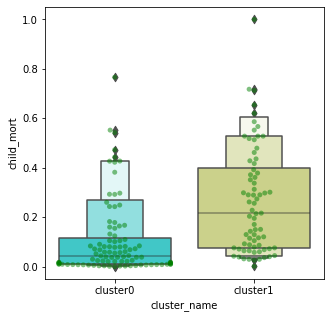

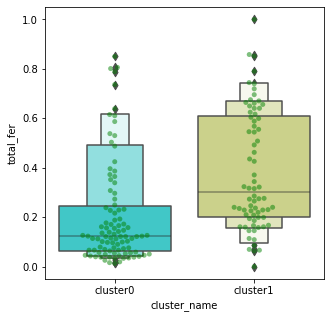

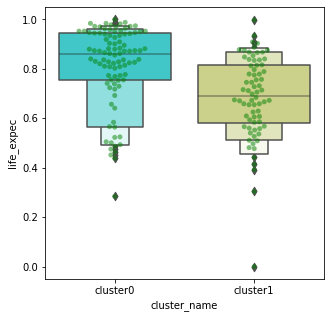

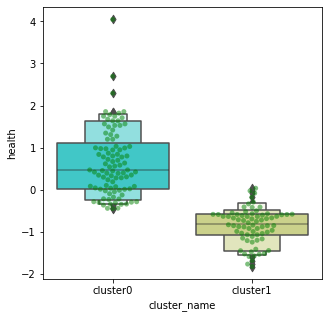

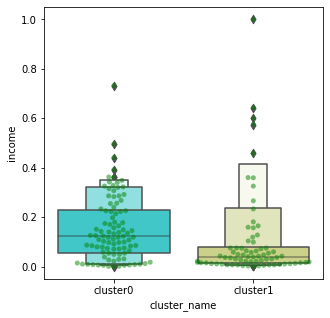

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 18.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


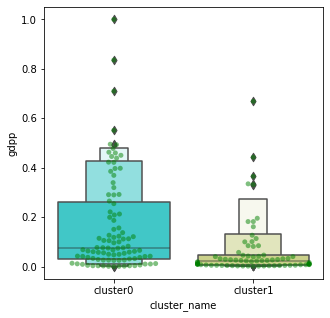

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 10.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


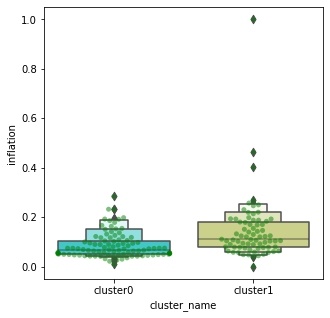

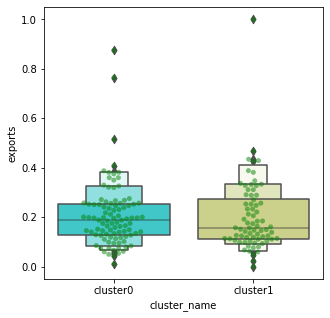

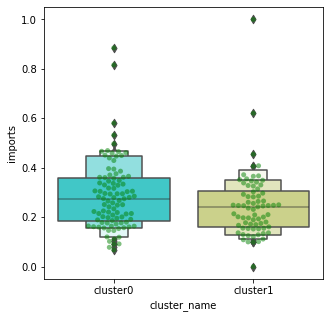

In [257]:
feature = ["child_mort", "total_fer", "life_expec", "health", "income", "gdpp", "inflation", "exports", "imports"]
for i in feature:
    plt.figure(figsize=(5,5))
    sns.swarmplot(x=df_new['cluster_name'], y=df_new[i], color='green', alpha=0.5)
    sns.boxenplot(x=df_new["cluster_name"], y=df_new[i], palette='rainbow')
    plt.show()

In [258]:
## child mortality is lower in cluster0 than cluster1 
## total fertility rate is also lower in cluster0 than cluster1

## life expectancy is higher in cluster0 than cluster1 
## health spend is also higher in cluster0 than cluster1

## average income is greater in cluster0 than cluster1
## gdpp is also greater in cluster0 than cluster1 
## inflation is lower in cluster0 than cluster1

## cluster1 have greater exports than cluster0
## cluster0 have greater imports than cluster1

In [259]:
print("Average normalised income of cluster0",df_new[df_new['cluster_name'] == "cluster0"]["income"].mean())

Average normalised income of cluster0 0.15409288791835932


In [260]:
print("Average normalised income of cluster0",df_new[df_new['cluster_name'] == "cluster1"]["income"].mean())

Average normalised income of cluster0 0.10501407300814009


In [261]:
accuracy_score(agglomerative, clust_labels1)

1.0

In [262]:
## conclusion:
# cluster0 are mostly developed countries with low fertility rates and low child mortality with high spending on health, therefore higher life expectancy
# where income and gdpp are high and inflation is low
# cluster1 are mostly undeveloped countries with higher fertility rates and higher child mortality with low spending on health, therefore lower life expectancy
# where income and gdpp are low and inflation is high

## countries that might need help from charity are the undeveloped countries mostly located in Africa and some parts of Asia

In [263]:
## can repeat cluster process without standardising/normalising dataset to get actual values of average life expectancy and average income